In [1]:
#importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load Dataset
# Example: Replace 'diabetes.csv' with your file name
df = pd.read_csv('diabetes.csv')

# Display the first few rows
df.head()


,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Outcome
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [3]:
# checking for missing values and null values

# Check for missing/null values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
  Number of times pregnant        0
 Plasma glucose concentration    0
 Diastolic blood pressure        0
 Triceps skin fold thickness     0
 2-Hour serum insulin            0
 Body mass index                 0
 Diabetes pedigree function      0
 Age (years)                     0
Outcome                          0
dtype: int64


In [4]:
# Check with percentage for better understanding
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing values (%):\n", missing_percentage)


Missing values (%):
  Number of times pregnant        0.0
 Plasma glucose concentration    0.0
 Diastolic blood pressure        0.0
 Triceps skin fold thickness     0.0
 2-Hour serum insulin            0.0
 Body mass index                 0.0
 Diabetes pedigree function      0.0
 Age (years)                     0.0
Outcome                          0.0
dtype: float64


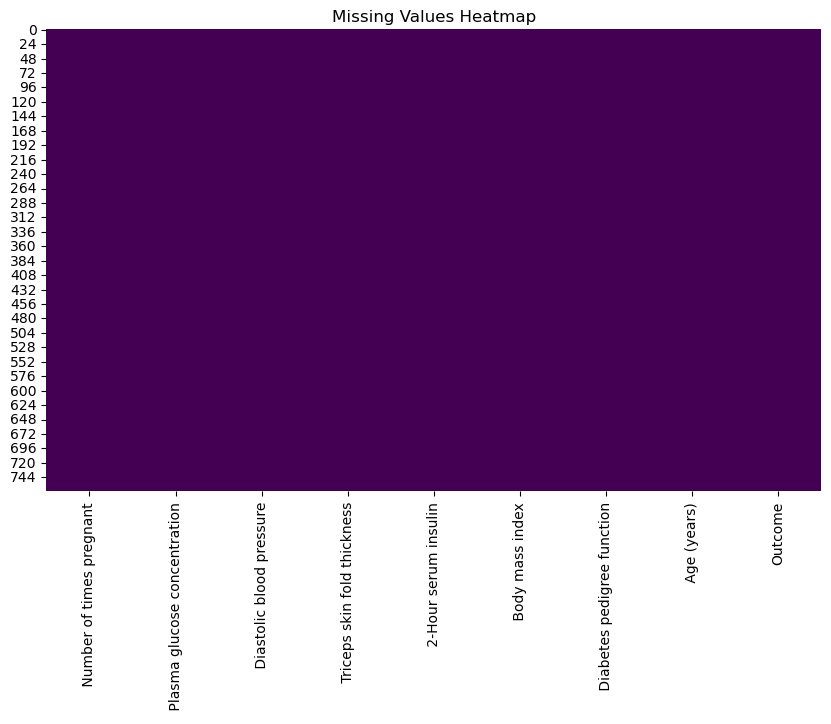

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visual heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [6]:

#Data Preprocessing

# Convert target variable to binary if it's not already
df['Outcome'] = df['Outcome'].apply(lambda x: 1 if x == 'YES' else 0)

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Train Models
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)


In [8]:
#Train Models
#Logistic Regression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)


In [10]:
#Evaluation Metrics

# Function to print evaluation metrics
def print_metrics(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

print_metrics(y_test, dt_pred, "Decision Tree")




Decision Tree Performance:
Accuracy: 0.7597402597402597
Precision: 0.6451612903225806
Recall: 0.7272727272727273
Confusion Matrix:
 [[77 22]
 [15 40]]


In [11]:
def print_metrics(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print_metrics(y_test, lr_pred, "Logistic Regression")


Logistic Regression Performance:
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
Confusion Matrix:
 [[78 21]
 [18 37]]


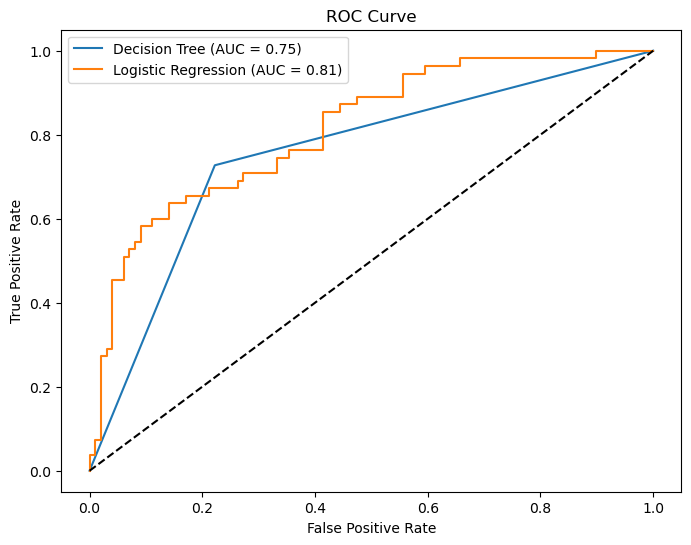

In [12]:
# ROC Curves & AUC
# Probabilities for ROC curve
dt_probs = dt_model.predict_proba(X_test)[:, 1]
lr_probs = lr_model.predict_proba(X_test)[:, 1]

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = %0.2f)' % auc(dt_fpr, dt_tpr))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = %0.2f)' % auc(lr_fpr, lr_tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


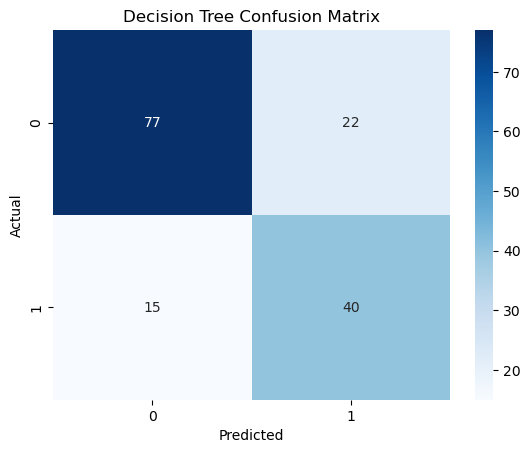

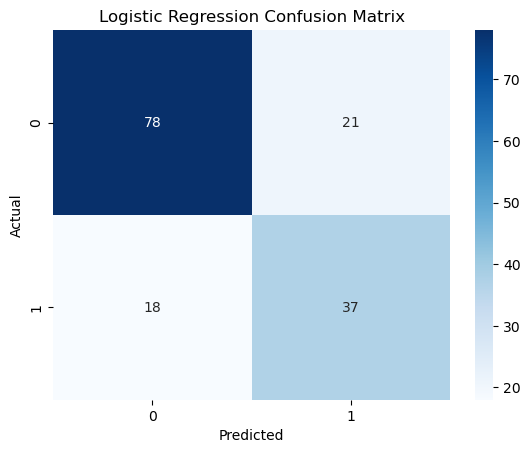

In [14]:
#Confusion Matrix Visualization


def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_conf_matrix(y_test, dt_pred, "Decision Tree Confusion Matrix")
plot_conf_matrix(y_test, lr_pred, "Logistic Regression Confusion Matrix")


In [15]:
from IPython.display import Markdown

Markdown("""
## ✅ Model Selection and Conclusion

After evaluating both **Decision Tree** and **Logistic Regression** models on the diabetes prediction dataset, we observed the following performance metrics:

| Metric         | Decision Tree       | Logistic Regression  |
|----------------|---------------------|-----------------------|
| Accuracy       | 0.7597              | 0.7468                |
| Precision      | 0.6452              | 0.6379                |
| Recall         | 0.7273              | 0.6727                |
| Confusion Matrix | [[77, 22], [15, 40]] | [[78, 21], [18, 37]] |

### 🔍 Recommendation:

While both models perform similarly in terms of overall **accuracy** and **precision**, the **Decision Tree** model achieves a **higher recall (0.727)** compared to **Logistic Regression (0.672)**.

Since this task involves **predicting diabetes**, it is more important to **identify as many positive cases as possible** (i.e., maximize recall) to ensure individuals with diabetes are not missed.

✅ **Therefore, we recommend using the Decision Tree model**, as it demonstrates better recall and slightly higher accuracy, making it more suitable for this healthcare-related classification problem.
""")



## ✅ Model Selection and Conclusion

After evaluating both **Decision Tree** and **Logistic Regression** models on the diabetes prediction dataset, we observed the following performance metrics:

| Metric         | Decision Tree       | Logistic Regression  |
|----------------|---------------------|-----------------------|
| Accuracy       | 0.7597              | 0.7468                |
| Precision      | 0.6452              | 0.6379                |
| Recall         | 0.7273              | 0.6727                |
| Confusion Matrix | [[77, 22], [15, 40]] | [[78, 21], [18, 37]] |

### 🔍 Recommendation:

While both models perform similarly in terms of overall **accuracy** and **precision**, the **Decision Tree** model achieves a **higher recall (0.727)** compared to **Logistic Regression (0.672)**.

Since this task involves **predicting diabetes**, it is more important to **identify as many positive cases as possible** (i.e., maximize recall) to ensure individuals with diabetes are not missed.

✅ **Therefore, we recommend using the Decision Tree model**, as it demonstrates better recall and slightly higher accuracy, making it more suitable for this healthcare-related classification problem.
